In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
file_path = 'Spellman.csv'
df = pd.read_csv(file_path)

In [14]:
print("Dataset Info:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    4381 non-null   object 
 1   40      4381 non-null   float64
 2   50      4381 non-null   float64
 3   60      4381 non-null   float64
 4   70      4381 non-null   float64
 5   80      4381 non-null   float64
 6   90      4381 non-null   float64
 7   100     4381 non-null   float64
 8   110     4381 non-null   float64
 9   120     4381 non-null   float64
 10  130     4381 non-null   float64
 11  140     4381 non-null   float64
 12  150     4381 non-null   float64
 13  160     4381 non-null   float64
 14  170     4381 non-null   float64
 15  180     4381 non-null   float64
 16  190     4381 non-null   float64
 17  200     4381 non-null   float64
 18  210     4381 non-null   float64
 19  220     4381 non-null   float64
 20  230     4381 non-null   float64
 21  240     4381 non-null  

In [15]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
time    0
40      0
50      0
60      0
70      0
80      0
90      0
100     0
110     0
120     0
130     0
140     0
150     0
160     0
170     0
180     0
190     0
200     0
210     0
220     0
230     0
240     0
250     0
260     0
dtype: int64


In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))


In [17]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

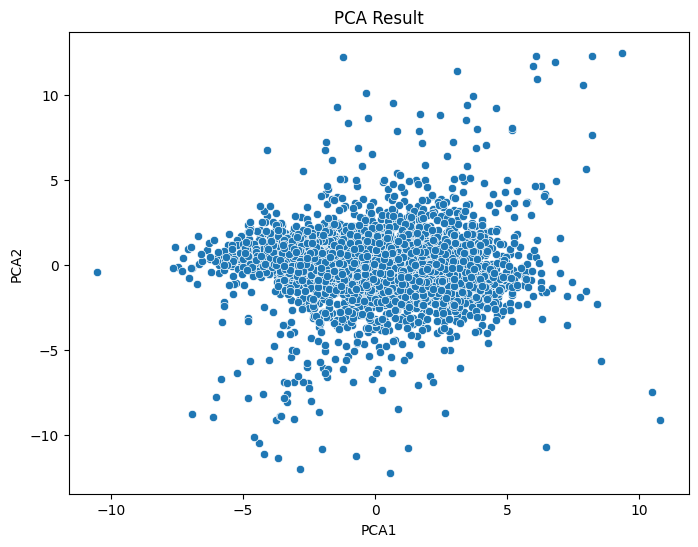

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'])
plt.title('PCA Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [20]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)
df['tSNE1'] = tsne_result[:, 0]
df['tSNE2'] = tsne_result[:, 1]

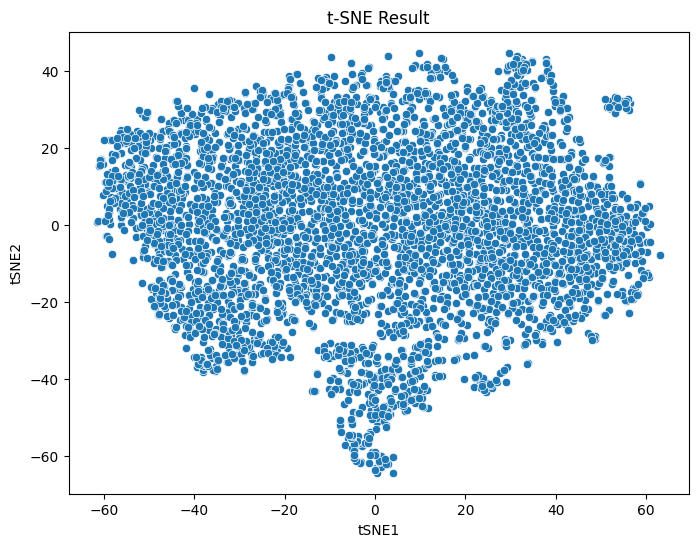

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['tSNE1'], y=df['tSNE2'])
plt.title('t-SNE Result')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

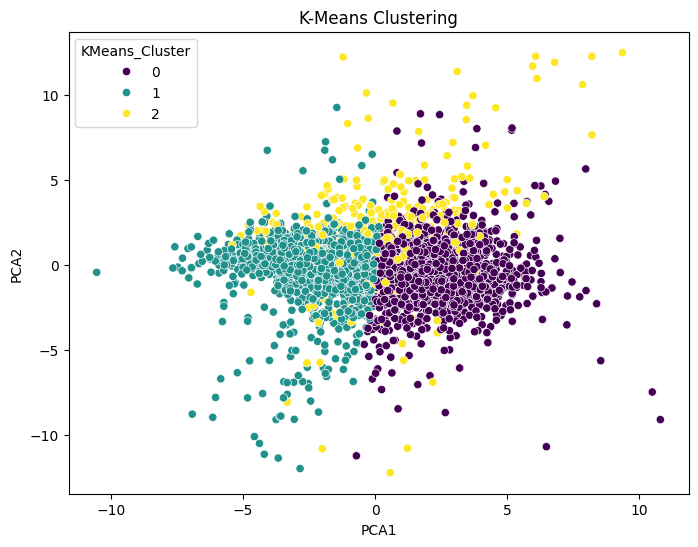

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [25]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

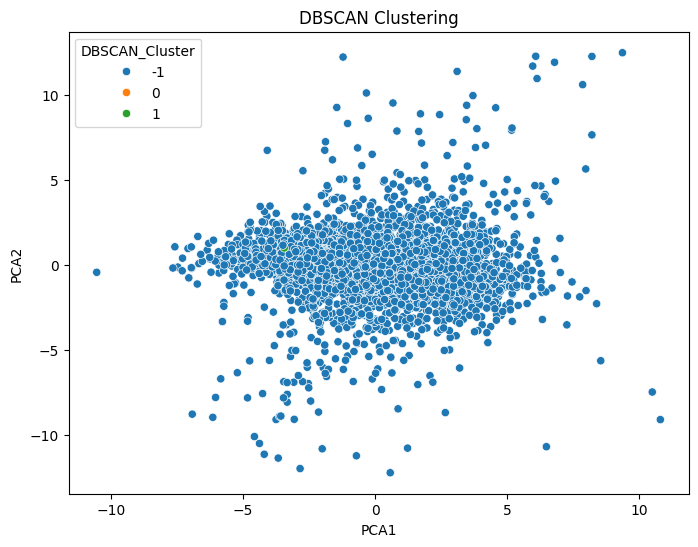

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['DBSCAN_Cluster'], palette='tab10')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [27]:
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(data_scaled)

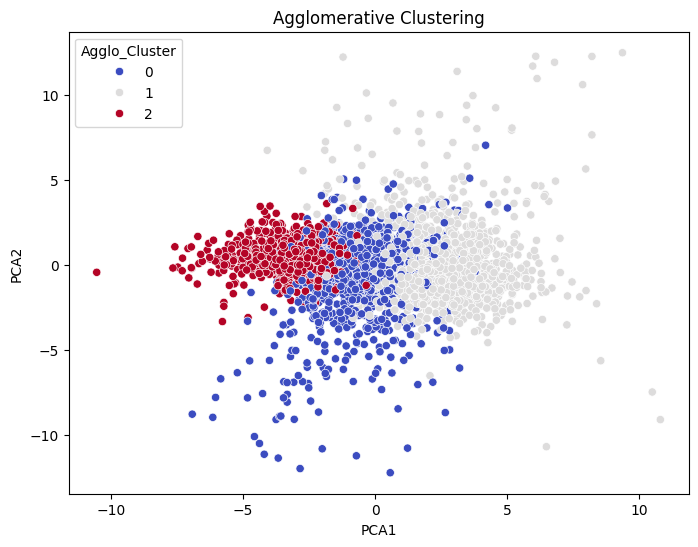

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Agglo_Cluster'], palette='coolwarm')
plt.title('Agglomerative Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

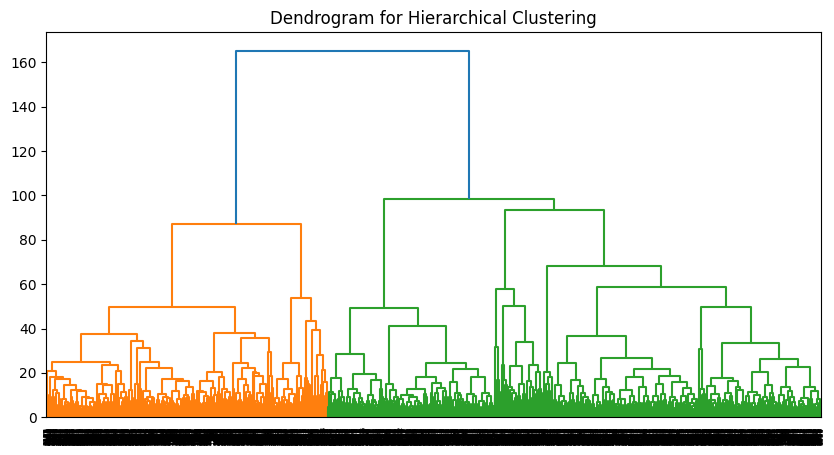

In [29]:
plt.figure(figsize=(10,5))
Z = linkage(data_scaled, method='ward')
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

Berdasarkan hasil analisis clustering dan dimensionality reduction pada dataset ekspresi gen, ditemukan bahwa gen-gen tertentu memiliki pola ekspresi yang serupa dan dapat dikelompokkan menggunakan metode K-Means, DBSCAN, dan Agglomerative Clustering. Hasil clustering menunjukkan bahwa terdapat beberapa kelompok gen yang diekspresikan bersamaan, yang mengindikasikan kemungkinan adanya regulasi bersama atau keterkaitan dalam fungsi biologis tertentu. Hal ini diperkuat oleh hasil PCA yang menunjukkan bahwa variabilitas data dapat direduksi menjadi dua dimensi utama, yang tetap mempertahankan sebagian besar informasi dalam dataset. Visualisasi dengan t-SNE juga mengungkap adanya kelompok-kelompok gen dengan ekspresi yang khas, yang mungkin terkait dengan kondisi biologis tertentu atau jalur metabolik spesifik.

Selain itu, analisis DBSCAN berhasil mengidentifikasi beberapa gen sebagai outlier, yang berarti ekspresi mereka berbeda secara